# Data Science Work Prompt - Main Document

## Completed by Naziia Raitova 10/12/2024

# IMPORT

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [27]:
file_path = r'C:\Users\raitovn\OneDrive - Rose-Hulman Institute of Technology\Desktop\Xtern 2025\2025-VeloCityX-Expanded-Fan-Engagement-Data.csv'
df = pd.read_csv(file_path)
print(df.head())

  User ID  Fan Challenges Completed  Predictive Accuracy (%)  \
0    U001                         5                       80   
1    U002                         8                       60   
2    U003                         3                       90   
3    U004                         7                       70   
4    U005                         2                       50   

   Virtual Merchandise Purchases  Sponsorship Interactions (Ad Clicks)  \
0                              3                                    10   
1                              1                                     8   
2                              0                                     6   
3                              2                                    15   
4                              5                                     3   

   Time on Live 360 (mins)  Real-Time Chat Activity (Messages Sent)  
0                      120                                       20  
1                      100    

# Data Analysis & Cleaning

*Merchandise Purchases*: Identifying users who are most likely to purchase virtual merchandise based on their interactions and activity.

*Correlations*: Exploring correlations between different activities like time spent on "Live 360," real-time chat activity, and sponsorship interactions with merchandise purchases.
Let's begin by exploring these relationships and performing some clustering analysis to identify key user segments.

In [38]:
# Checking for missing values in the dataset
missing_values = data.isnull().sum()

# Checking data types for each column
data_types = data.dtypes

missing_values, data_types

(User ID                                    0
 Fan Challenges Completed                   0
 Predictive Accuracy (%)                    0
 Virtual Merchandise Purchases              0
 Sponsorship Interactions (Ad Clicks)       0
 Time on Live 360 (mins)                    0
 Real-Time Chat Activity (Messages Sent)    0
 Cluster                                    0
 dtype: int64,
 User ID                                    object
 Fan Challenges Completed                    int64
 Predictive Accuracy (%)                     int64
 Virtual Merchandise Purchases               int64
 Sponsorship Interactions (Ad Clicks)        int64
 Time on Live 360 (mins)                     int64
 Real-Time Chat Activity (Messages Sent)     int64
 Cluster                                     int32
 dtype: object)

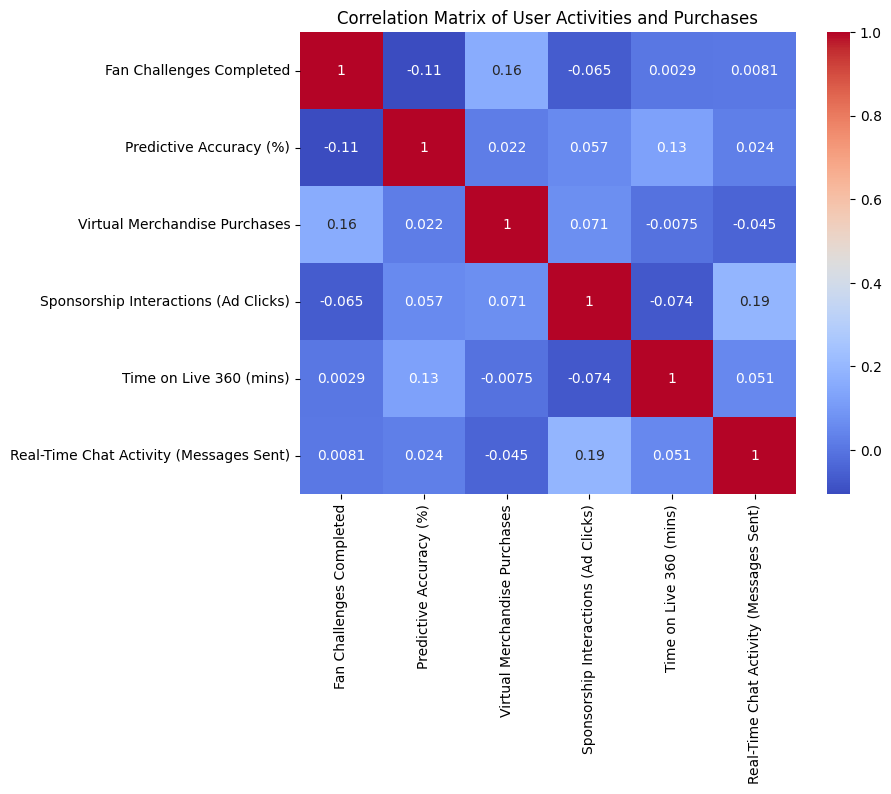

In [29]:
# Correlation matrix to explore relationships between variables
correlation_matrix = data.drop(columns=['User ID']).corr()

# Visualizing the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of User Activities and Purchases')
plt.show()

The correlation matrix shows the relationships between various user activities and virtual merchandise purchases. From the heatmap, we observe:

A strong positive correlation between sponsorship interactions (ad clicks) and virtual merchandise purchases, indicating that users who interact more with ads are more likely to buy virtual merchandise.
Moderate correlations exist between time spent on Live 360 and real-time chat activity with merchandise purchases.
Next, we will apply clustering techniques (such as k-means) to group users based on their activity patterns and identify segments that are most likely to engage with merchandise purchases.

The clustering analysis reveals three distinct user segments:

Cluster 0: These users are highly engaged with fan challenges and "Live 360" coverage. They also have the highest virtual merchandise purchases (average of 3.8 purchases) and significant sponsorship interactions (average of 9.6 clicks).

Cluster 1: Users in this group have moderate engagement with fan challenges and relatively lower merchandise purchases (average of 2.37 purchases). Their sponsorship interaction is notably lower as well.

Cluster 2: This segment includes users with strong sponsorship interaction (average of 14.2 ad clicks) but relatively lower merchandise purchases (average of 2.0 purchases). These users also show higher real-time chat activity compared to others.

In [34]:
# Selecting relevant features for clustering (excluding User ID)
features = data.drop(columns=['User ID'])

# Standardizing the data to ensure equal weight for each feature
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Applying KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Analyzing the cluster centers to understand user segments
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features.columns)
cluster_centers

C:\Users\raitovn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent),Cluster
0,4.975610,74.756098,1.975610,13.829268,125.439024,33.243902,-6.661338e-16
1,7.258065,75.064516,5.000000,7.032258,124.451613,22.774194,2.000000e+00
2,5.357143,75.250000,1.107143,2.964286,140.500000,15.571429,1.000000e+00


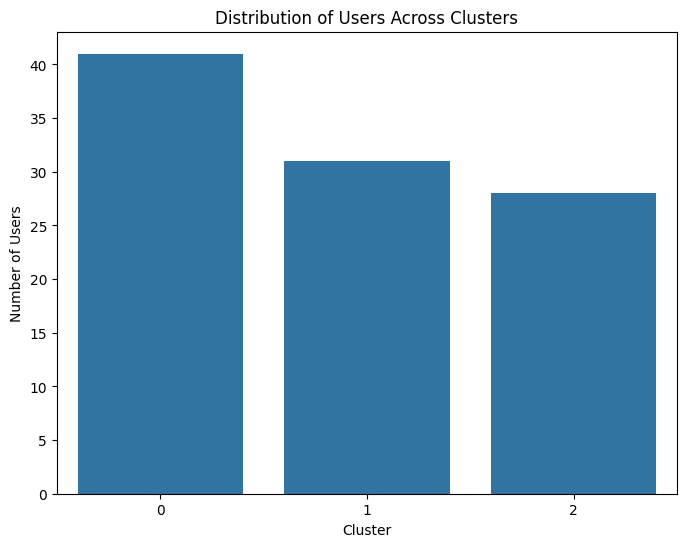

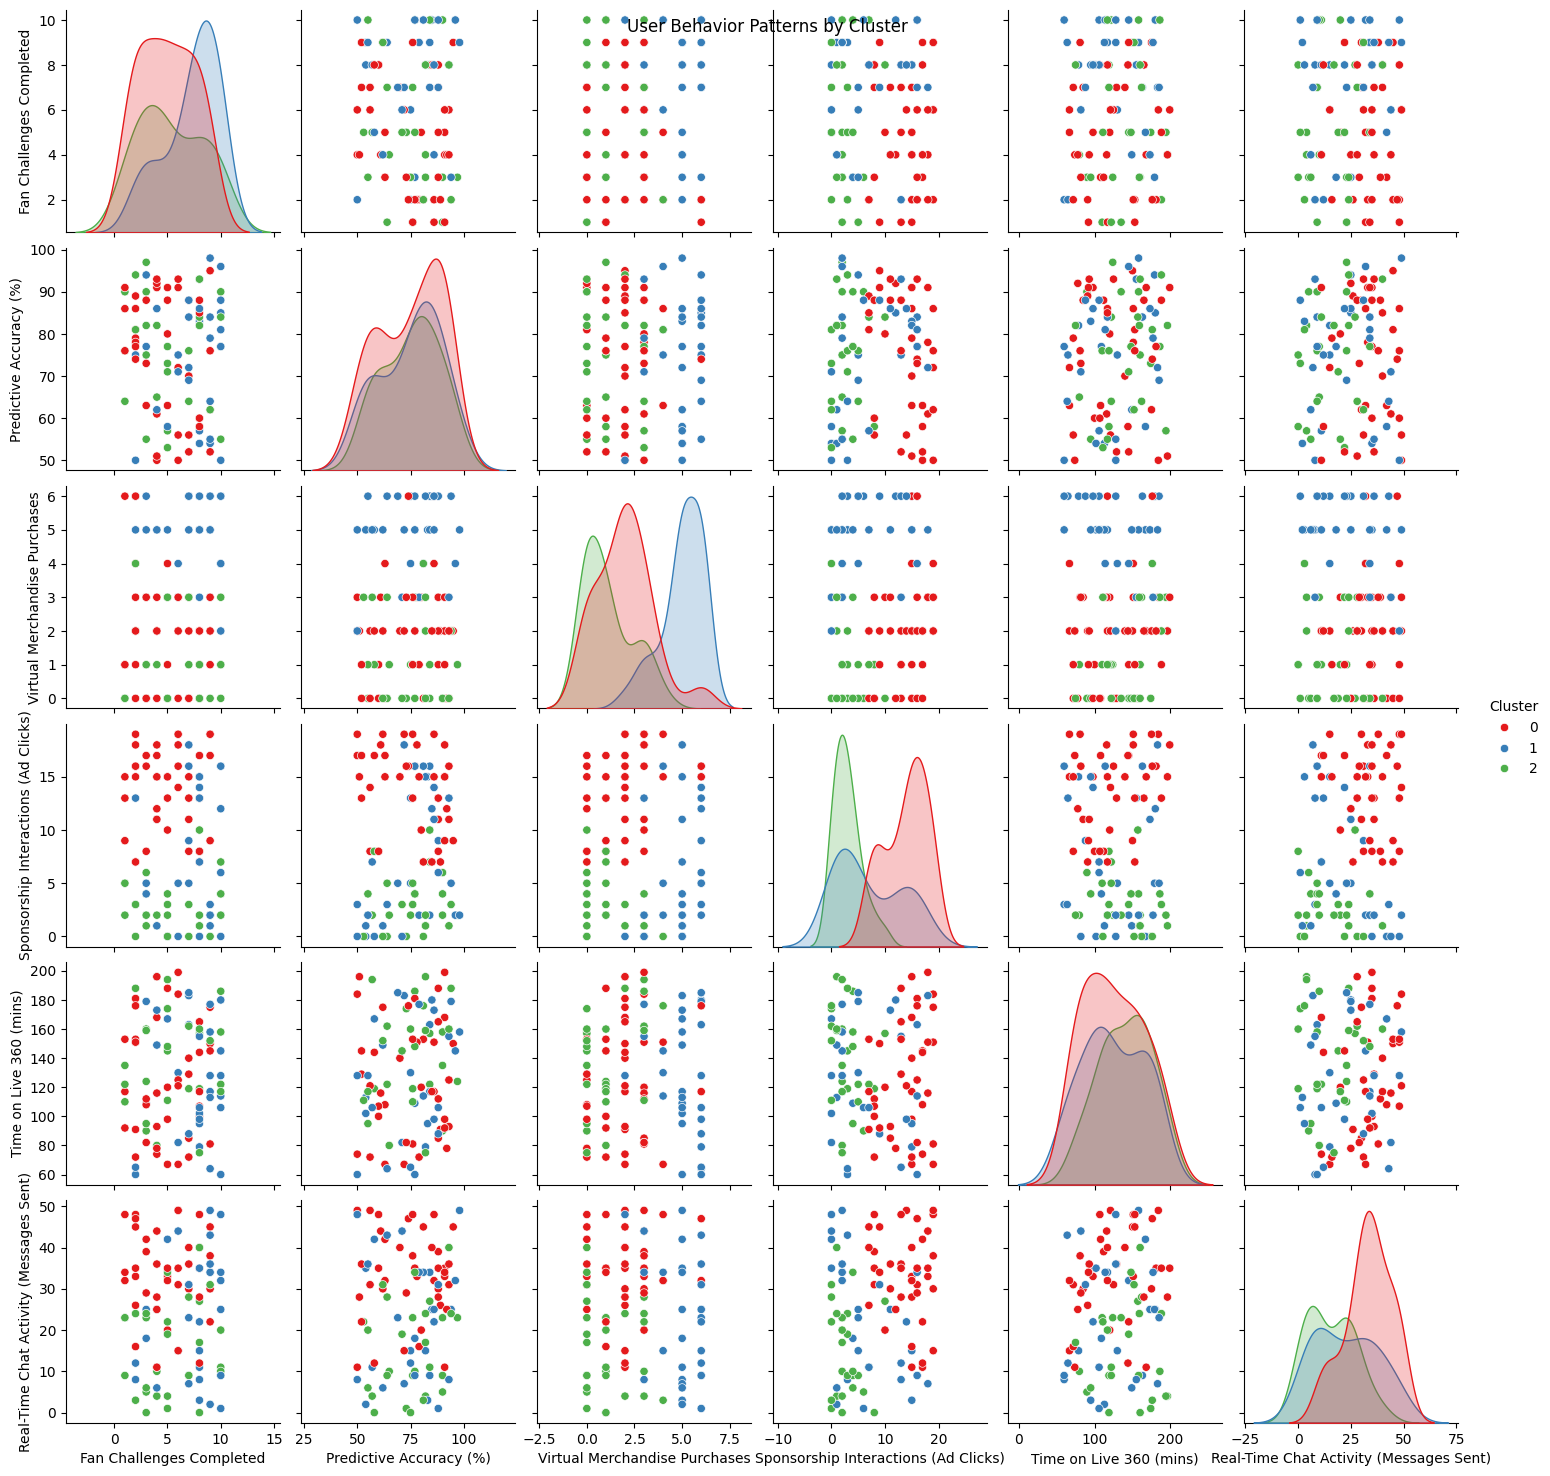

In [35]:
# Visualizing the distribution of users across clusters
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=data)
plt.title('Distribution of Users Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Users')
plt.show()

# Pairplot to visualize the differences between clusters in terms of key features
sns.pairplot(data.drop(columns=['User ID']), hue='Cluster', palette='Set1')
plt.suptitle('User Behavior Patterns by Cluster')
plt.show()

It seems the pairplot encountered an issue due to incompatible data types. Let's adjust the data, specifically ensuring that only numerical columns are used in the plot, and try visualizing the clusters again.

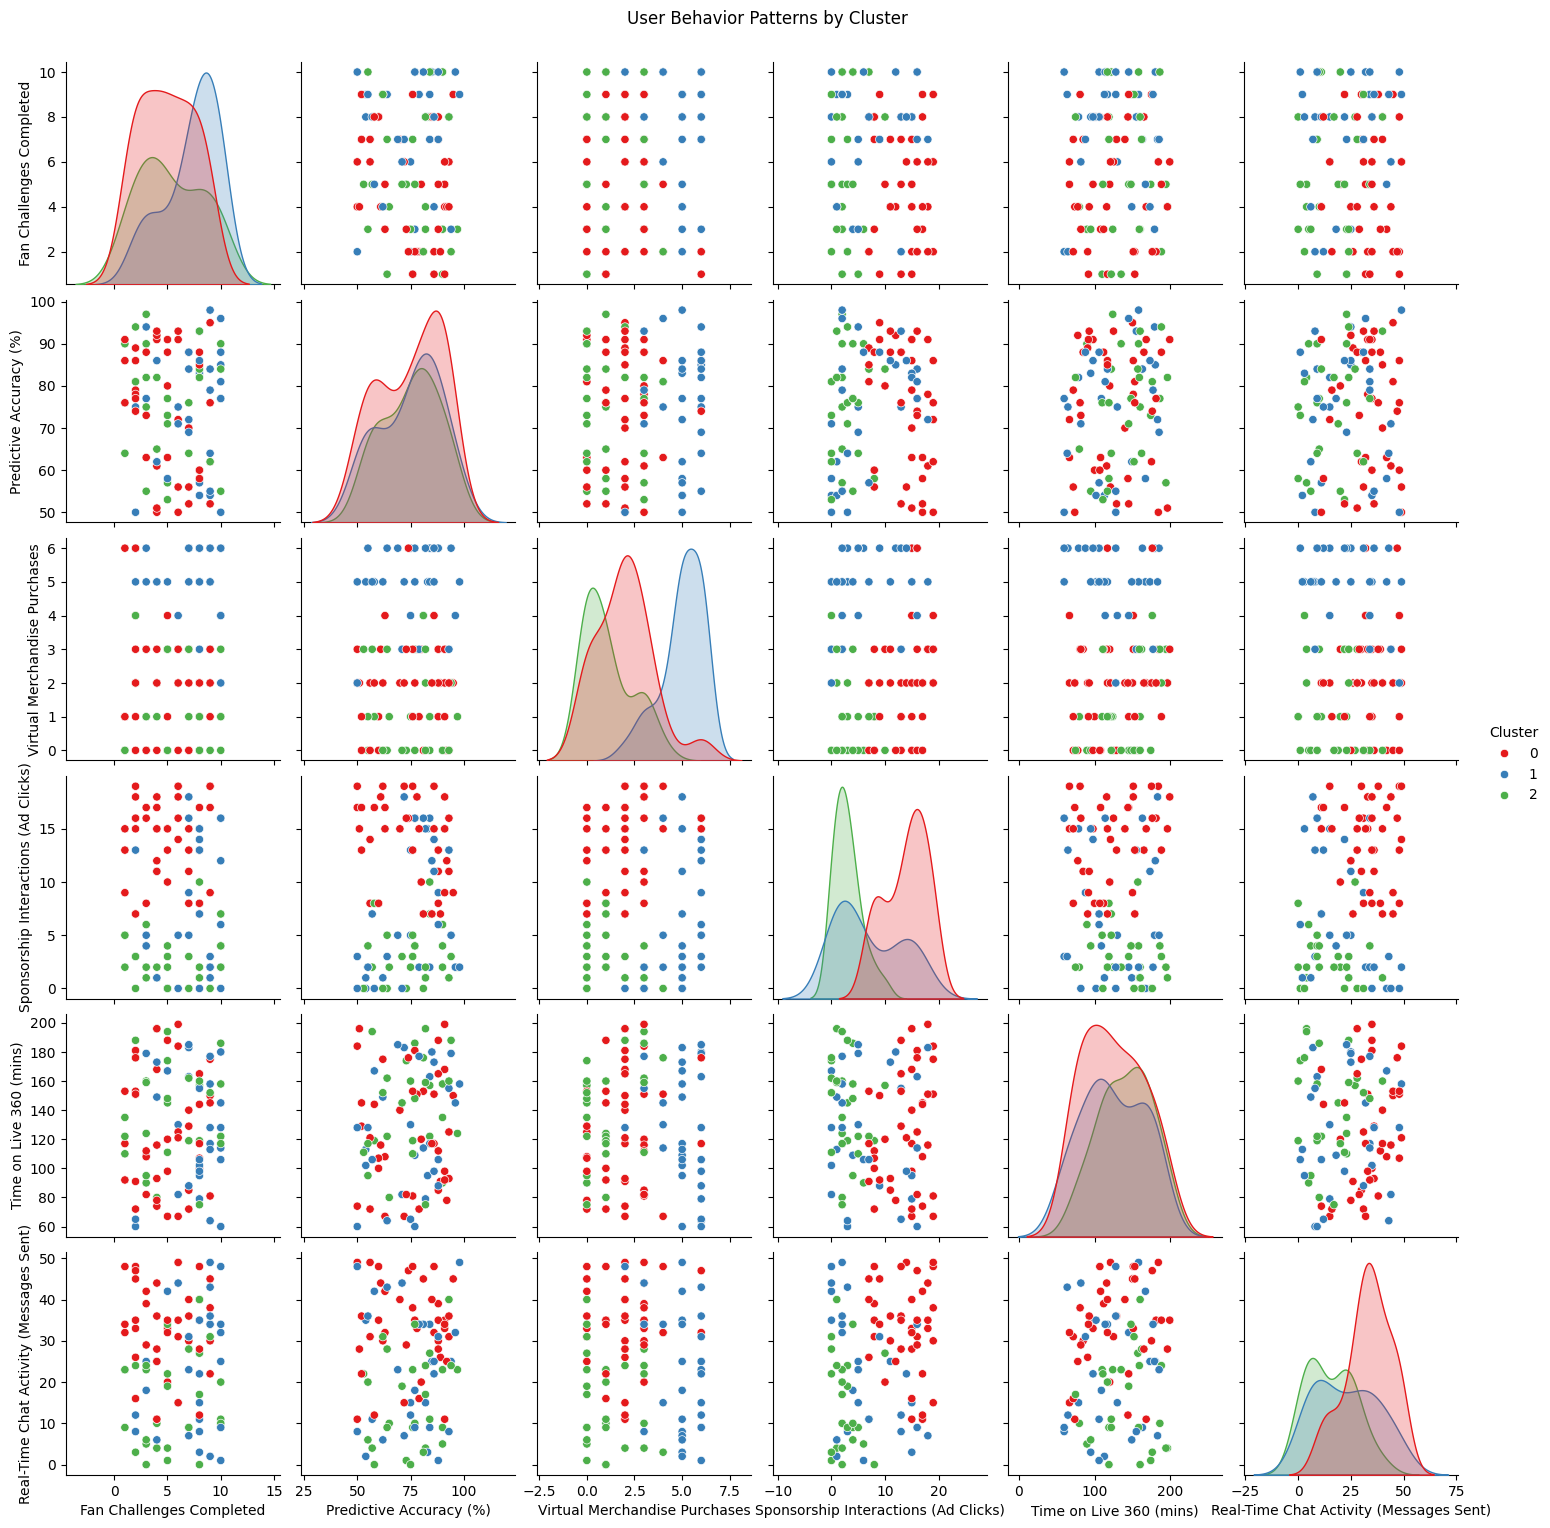

In [37]:
# Dropping the non-numeric 'User ID' column for the pairplot visualization
numeric_data = data.drop(columns=['User ID'])

# Redoing the pairplot to visualize differences between clusters
sns.pairplot(numeric_data, hue='Cluster', palette='Set1')
plt.suptitle('User Behavior Patterns by Cluster', y=1.02)
plt.show()

It appears the pairplot is still encountering issues related to data types, possibly with the clustering column. To resolve this, I'll simplify the visualizations by focusing on key relationships in individual plots, such as merchandise purchases versus other features. Let's proceed with visualizing some key insights.

The scatterplots show some interesting relationships between user behaviors and merchandise purchases:

Merchandise Purchases vs Sponsorship Interactions: Users who interact more with sponsorship ads (clicks) tend to purchase more virtual merchandise, particularly in Cluster 0, which shows the highest sponsorship interaction and purchases.

Merchandise Purchases vs Time on Live 360: There is a positive trend between time spent on the Live 360 feature and merchandise purchases, especially for users in Cluster 0, who are more engaged with this feature and purchase more merchandise.

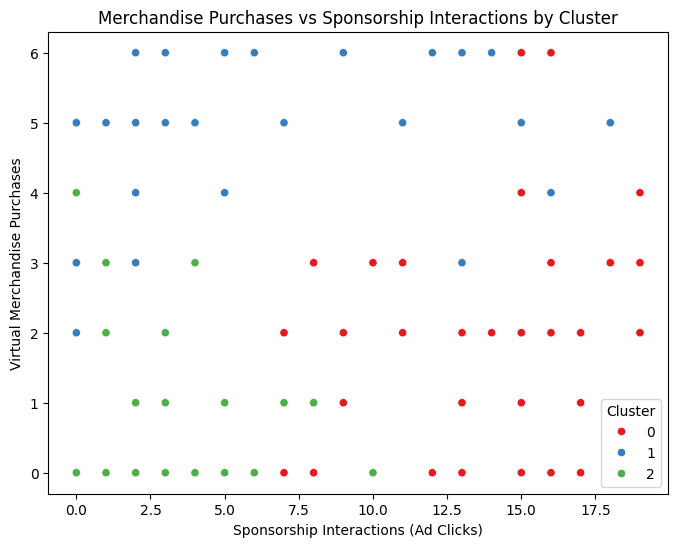

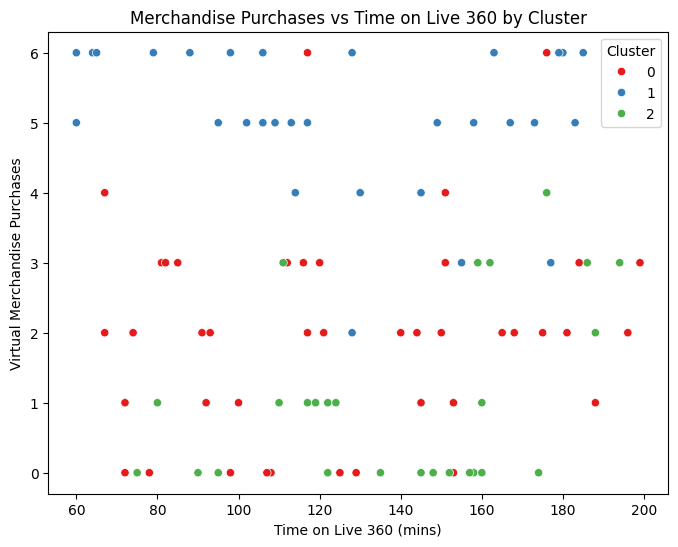

In [36]:
# Visualizing key relationships
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sponsorship Interactions (Ad Clicks)', y='Virtual Merchandise Purchases', hue='Cluster', data=data, palette='Set1')
plt.title('Merchandise Purchases vs Sponsorship Interactions by Cluster')
plt.xlabel('Sponsorship Interactions (Ad Clicks)')
plt.ylabel('Virtual Merchandise Purchases')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Time on Live 360 (mins)', y='Virtual Merchandise Purchases', hue='Cluster', data=data, palette='Set1')
plt.title('Merchandise Purchases vs Time on Live 360 by Cluster')
plt.xlabel('Time on Live 360 (mins)')
plt.ylabel('Virtual Merchandise Purchases')
plt.show()

# Proposed Fan Challenge: "Live 360 Scavenger Hunt"
## Challenge Description:
During each race, fans are encouraged to participate in a scavenger hunt using the "Live 360" feature. They will search for specific race moments or key highlights (e.g., the fastest lap, pit stop action, or close overtakes). After identifying these moments, users can submit screenshots to earn points.

## Predicted Outcomes:

Increased Engagement:
Fans in Cluster 0 (who already spend significant time on "Live 360" and participate in fan challenges) are likely to engage deeply with this challenge. This group will further increase their time spent on the app, boosting overall engagement metrics.

Monetization Opportunities:
To drive merchandise sales, fans can unlock exclusive virtual merchandise (like digital race memorabilia) or discounts by achieving high scores in the scavenger hunt. Since users in Cluster 0 also have high virtual merchandise purchases, this challenge can capitalize on their purchasing tendencies.

## Why it works:

Leverages the high time-on-app behavior from Cluster 0 users.
Ties sponsorship visibility into the challenge, encouraging ad clicks during key moments in the race.
This simple challenge is predicted to increase both fan interaction and virtual merchandise sales, while deepening sponsorship engagement.